In [149]:
import os
import math
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix,csc_matrix
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import requests 
import csv
import math
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix,csc_matrix
from sklearn.feature_extraction.text import CountVectorizer
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, coo_matrix
import csv


In [150]:

def read_urls(filename):
    f = open(filename,"r") 
    myList = {}

    for line in f:
        splitting = line.split()
        name =  os.path.basename(splitting[0]).split('?')[0] 
        if name in myList:
            myList[name].append(splitting[0])
        else:
            myList[name] = splitting
    f.close() 
    return myList


url = read_urls('path.txt')
rest_name = url.keys()
print url

{'arbor-chicago': ['http://www.yelp.com/biz/arbor-chicago'], 'velvet-taco-chicago': ['http://www.yelp.com/biz/velvet-taco-chicago', 'http://www.yelp.com/biz/velvet-taco-chicago?start=60&sort_by=elites_desc'], 'the-purple-pig-chicago': ['http://www.yelp.com/biz/the-purple-pig-chicago', 'http://www.yelp.com/biz/the-purple-pig-chicago?start=740&sort_by=elites_desc'], 'boeufhaus-chicago': ['http://www.yelp.com/biz/boeufhaus-chicago', 'http://www.yelp.com/biz/boeufhaus-chicago?sort_by=rating_asc'], 'au-cheval-chicago': ['http://www.yelp.com/biz/au-cheval-chicago', 'http://www.yelp.com/biz/au-cheval-chicago?start=420&sort_by=elites_desc'], 'the-roost-carolina-kitchen-chicago': ['http://www.yelp.com/biz/the-roost-carolina-kitchen-chicago', 'http://www.yelp.com/biz/the-roost-carolina-kitchen-chicago?start=60&sort_by=elites_desc'], 'smoque-bbq-chicago': ['http://www.yelp.com/biz/smoque-bbq-chicago', 'http://www.yelp.com/biz/smoque-bbq-chicago?sort_by=rating_asc'], 'knife-and-tine-chicago-2': ['

In [151]:
#To get Username and COrresponding ratings from webpage
from bs4 import BeautifulSoup
import requests 
Ratings_lst=[]
user_rating ={}
for rest in url:
    for path in url[rest]:
        r=requests.get(path)
        soup=BeautifulSoup(r.content)
        #soup.findAll(attrs={"name":"description"})
        for each_div in soup.findAll('a',{'class':'user-display-name'}):
            #for i in soup.findAll('div',{'class':'rating-very-large'}):
            #    if i:
            count = 1
            i = soup.findAll('div',{'class':'rating-very-large'})[count]
            if each_div.text in user_rating:
                user_rating[each_div.text].append((i.find('i').get('title'), rest))
            else:             
                user_rating[each_div.text] = [(i.find('i').get('title'), rest)]
            count = count +1
    #print (i.attrs.has_key
    #print i.get('title')
       # Ratings_lst.append(i.find('i').get('title'))
print (user_rating)


{u'Rebecca D.': [('5.0 star rating', 'au-cheval-chicago')], u'Dori S.': [('1.0 star rating', 'smoque-bbq-chicago')], u'Cami P.': [('5.0 star rating', 'big-and-littles-restaurant-chicago-2')], u'Alicia M.': [('5.0 star rating', 'smalls-smoke-shack-and-more-chicago')], u'Gary B.': [('5.0 star rating', 'little-bad-wolf-chicago')], u'John I.': [('5.0 star rating', 'big-and-littles-restaurant-chicago-2')], u'Gina V.': [('5.0 star rating', 'the-angry-crab-chicago-3')], u'Shahzad S.': [('5.0 star rating', 'the-roost-carolina-kitchen-chicago')], u'Amanda K.': [('5.0 star rating', 'knife-and-tine-chicago-2')], u'Megan M.': [('1.0 star rating', 'boeufhaus-chicago')], u'Mark B.': [('5.0 star rating', 'girl-and-the-goat-chicago')], u'Steve S.': [('5.0 star rating', 'cafe-versailles-chicago')], u'Colleen M.': [('5.0 star rating', 'au-cheval-chicago')], u'Lisa H.': [('4.0 star rating', 'the-angry-crab-chicago-3')], u'Andrew F.': [('1.0 star rating', 'big-and-littles-restaurant-chicago-2')], u'Paul G

In [152]:
#Write the Dictionary of List of Tuples of Username, Ratings and Restaurant name
import csv
writer = csv.writer(open('Final_input_file.csv', 'wb'))
for key in user_rating:
    temp = []
    temp.append(key)
    for value in user_rating[key]:
        for x in value:
            temp.append(x)
    writer.writerow(temp)

In [153]:
#Reads the csv file
import csv
reader = csv.reader(open('Final_input_file.csv', 'r'))
dictionary_input_file = {}
for row in reader:
    x = len(row)
    dictionary_input_file[row[0]] = row[1:]
print dictionary_input_file

{'Rebecca D.': ['5.0 star rating', 'au-cheval-chicago'], 'Dori S.': ['1.0 star rating', 'smoque-bbq-chicago'], 'Cami P.': ['5.0 star rating', 'big-and-littles-restaurant-chicago-2'], 'Alicia M.': ['5.0 star rating', 'smalls-smoke-shack-and-more-chicago'], 'Gary B.': ['5.0 star rating', 'little-bad-wolf-chicago'], 'John I.': ['5.0 star rating', 'big-and-littles-restaurant-chicago-2'], 'Gina V.': ['5.0 star rating', 'the-angry-crab-chicago-3'], 'Shahzad S.': ['5.0 star rating', 'the-roost-carolina-kitchen-chicago'], 'Amanda K.': ['5.0 star rating', 'knife-and-tine-chicago-2'], 'Megan M.': ['1.0 star rating', 'boeufhaus-chicago'], 'Mark B.': ['5.0 star rating', 'girl-and-the-goat-chicago'], 'Steve S.': ['5.0 star rating', 'cafe-versailles-chicago'], 'Colleen M.': ['5.0 star rating', 'au-cheval-chicago'], 'Lisa H.': ['4.0 star rating', 'the-angry-crab-chicago-3'], 'Andrew F.': ['1.0 star rating', 'big-and-littles-restaurant-chicago-2'], 'Paul G.': ['5.0 star rating', 'smoque-bbq-chicago', 

In [154]:
dic_row = {}
for i in dictionary_input_file:
    list1 = []
    for j in range(len(dictionary_input_file[i])):
        if j%2 != 0:
            list1.append(dictionary_input_file[i][j])
    dic_row[i] = list1
    

In [155]:
restaurant_names=[]
userratings_numpy_array_lst=[]

for i in user_rating.values():
    if i[0][1] not in restaurant_names:
        restaurant_names.append(i[0][1])
        userratings_numpy_array_lst.append( i[0][0])
np.array(restaurant_names) 


array(['au-cheval-chicago', 'smoque-bbq-chicago',
       'big-and-littles-restaurant-chicago-2',
       'smalls-smoke-shack-and-more-chicago', 'little-bad-wolf-chicago',
       'the-angry-crab-chicago-3', 'the-roost-carolina-kitchen-chicago',
       'knife-and-tine-chicago-2', 'boeufhaus-chicago',
       'girl-and-the-goat-chicago', 'cafe-versailles-chicago',
       'the-purple-pig-chicago', 'farmhouse-chicago-3',
       't-and-b-grill-chicago', 'mother-cluckers-kitchen-chicago',
       'arbor-chicago', 'gather-chicago', 'velvet-taco-chicago',
       'hq-howard-quintero-chicago-2', 'jj-thai-street-food-chicago'], 
      dtype='|S36')

In [156]:
userratings_numpy_array_lst=[]
for i in user_rating.values():
    userratings_numpy_array_lst.append( i[0][0])
ratings=[]
for i in userratings_numpy_array_lst:
    ratings.append(float(i.split()[0]))
np.array(ratings) 

array([ 5.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  1.,  5.,  5.,  5.,
        4.,  1.,  5.,  5.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  5.,
        5.,  5.,  4.,  5.,  5.,  5.,  5.,  4.,  4.,  5.,  5.,  1.,  4.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  1.,  5.,
        5.,  4.,  5.,  1.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  1.,  4.,  5.,  1.,  5.,  5.,  1.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  1.,  1.,  5.,  5.,  1.,  1.,
        5.,  5.,  4.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  1.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  1.,  1.,  5.,  5.,
        5.,  5.,  5.,  4.,  5.,  5.,  5.,  5.,  5.,  1.,  5.,  4.,  5.,
        5.,  5.,  5.,  5.,  5.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,
        5.,  5.,  5.,  5.,  5.,  1.,  5.,  5.,  5.,  4.,  5.,  5

In [157]:
user_rating

{u'Aaron Jae M.': [('5.0 star rating',
   'big-and-littles-restaurant-chicago-2')],
 u'Aaron P.': [('5.0 star rating', 'the-purple-pig-chicago'),
  ('1.0 star rating', 'farmhouse-chicago-3')],
 u'Aaron S.': [('5.0 star rating', 'little-bad-wolf-chicago')],
 u'Adam D.': [('5.0 star rating', 'smalls-smoke-shack-and-more-chicago')],
 u'Adam W.': [('5.0 star rating', 'velvet-taco-chicago'),
  ('4.0 star rating', 'the-roost-carolina-kitchen-chicago')],
 u'Aditi M.': [('4.0 star rating', 'farmhouse-chicago-3')],
 u'Adriana R.': [('1.0 star rating', 'big-and-littles-restaurant-chicago-2')],
 u'Adrienne H.': [('5.0 star rating', 'velvet-taco-chicago'),
  ('5.0 star rating', 'velvet-taco-chicago')],
 u'Aj A.': [('5.0 star rating', 'gather-chicago')],
 u'Albert K.': [('5.0 star rating', 'the-roost-carolina-kitchen-chicago')],
 u'Alex A.': [('5.0 star rating', 'au-cheval-chicago'),
  ('4.0 star rating', 'au-cheval-chicago'),
  ('5.0 star rating', 'knife-and-tine-chicago-2'),
  ('5.0 star rating',

In [158]:
user_rating_dict = {}
for i in user_rating:
    rate = [0.0]*len(rest_name)
    for j in user_rating[i]:
        rating = float(j[0].split()[0])
        index = rest_name.index(j[1])
        rate[index] = rating
    user_rating_dict[i] = rate
print user_rating_dict

{u'Rebecca D.': [0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'Dori S.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'Cami P.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'Alicia M.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0], u'Gary B.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'John I.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'Gina V.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'Shahzad S.': [0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], u'Amanda K.': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [159]:
#Ratings Matrix
matrix = []
for user in sorted(user_rating):
    array= [0. for i in rest_name]
    for rating in user_rating[user]:
        rate = float(rating[0].split()[0])
        array[rest_name.index(rating[1])] = 1.* rate
    matrix.append(array)
csrmatrix = csr_matrix(matrix)
print csrmatrix

  (0, 11)	5.0
  (1, 2)	5.0
  (1, 13)	1.0
  (2, 9)	5.0
  (3, 17)	5.0
  (4, 1)	5.0
  (4, 5)	4.0
  (5, 13)	4.0
  (6, 11)	1.0
  (7, 1)	5.0
  (8, 15)	5.0
  (9, 5)	5.0
  (10, 4)	4.0
  (10, 7)	5.0
  (10, 18)	5.0
  (11, 14)	5.0
  (12, 15)	5.0
  (13, 12)	5.0
  (14, 17)	5.0
  (15, 4)	5.0
  (16, 5)	5.0
  (16, 9)	5.0
  (17, 13)	1.0
  (18, 7)	5.0
  (19, 6)	5.0
  :	:
  (537, 8)	5.0
  (538, 7)	5.0
  (539, 3)	1.0
  (540, 7)	5.0
  (541, 18)	5.0
  (542, 14)	5.0
  (542, 19)	5.0
  (543, 2)	5.0
  (544, 9)	5.0
  (545, 17)	5.0
  (546, 13)	4.0
  (547, 2)	5.0
  (548, 4)	4.0
  (549, 10)	5.0
  (550, 15)	4.0
  (551, 15)	4.0
  (552, 9)	5.0
  (552, 17)	5.0
  (553, 5)	5.0
  (554, 6)	1.0
  (555, 6)	1.0
  (556, 17)	5.0
  (557, 8)	5.0
  (558, 3)	5.0
  (559, 11)	1.0


In [160]:
Cuisines_lst=[]
f = open('Cuisines.txt',"r")
for i in f:
    Cuisines_lst.append(i)
print Cuisines_lst
len(Cuisines_lst)

['American New\n', 'Tapas/Small Plates, Mediterranean\n', 'American New,Bars\n', 'American Traditional\n', 'Latin American\n', 'Wines , Bars, American New\n', 'American New,Fish & Chips, Burgers\n', 'Thai\n', 'American New, Coffee & Tea, Breakfast & Brunch\n', 'American New\n', 'American New,Mexican\n', 'Southern\n', 'American Traditional\n', 'Southern\n', 'Brasseries, Cocktail Bars, Sandwiches \n', 'Cafes, Creperies \n', 'American New,Bars,Diners\n', 'Barbeque\n', 'Seafood, Southern, Cajun/Creole\n', 'Barbeque,American New,American Traditional']


20

In [161]:
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b', dtype=np.float)
Cuisine_matrix = vectorizer.fit_transform(Cuisines_lst)
vocabulary = np.array(vectorizer.get_feature_names())
print Cuisine_matrix.todense()
print vocabulary

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [162]:
def document_frequencies(Cuisine_matrix):
    from collections import Counter  
    return 1.*np.array(dict(Counter(Cuisine_matrix.indices)).values())
    
dfs = document_frequencies(Cuisine_matrix)
dfs

array([ 12.,   2.,   4.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   9.,   1.,   1.,
         1.,   1.,   3.,   1.,   1.,   1.,   3.,   1.])

In [163]:
def tfidf(Cuisine_matrix, dfs):
    Cuisine_matrix1 = Cuisine_matrix.copy()
    return csr_matrix(Cuisine_matrix1/dfs)
    

# tfidf matrix: row=movie, col=term
tfidf_matrix = tfidf(Cuisine_matrix, dfs)
tfidf_matrix.todense()

matrix([[ 0.08333333,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.11111111,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.08333333,  0.        ,  0.25      ,  0.        ,  0.        ,
          0.        ,  0.        ,  

In [164]:
def make_user_profiles(ratings, tfidf_matrix):
    return csr_matrix(csrmatrix.dot(tfidf_matrix)/csrmatrix.sum(axis=1))

user_profiles = make_user_profiles(csrmatrix, tfidf_matrix)
#print type(user_profiles)
user_profiles.todense()

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.06944444,  0.        ,  0.20833333, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.08333333,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.08333333,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.08333333,  0.        ,  0.        , ...,  0.        ,
          0.33333333,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [165]:
def norm(vector):
    """
    Compute the Euclidean norm of one row of a csr_matrix.
    no
    Input:
      vector...one row from a csr_matrix
    Returns:
      a float, the Euclidean norm of the vector.
    """
    
    return np.sqrt(np.sum([x*x for x in  vector.toarray()]))



In [166]:
def cosine(v1, v2):
    """
    Compute the cosine similarity between two vectors (rows from a csr_matrix).
    https://en.wikipedia.org/wiki/Cosine_similarity
    Params:
      v1...one vector
      v2...another vector
    Returns:
      a float representing the cosine similarity/
    """
    nrm_val = norm(v1) * norm(v2)
    
    return np.dot (v1.toarray(),v2.T.toarray()) / (nrm_val)



In [167]:
#Jaccard Similarity
jaccard_dict = {}
for i in dic_row:
    scores = []
    for j in dic_row:
        if i != j:     
            x = ( 1. * len(set(dic_row[i]) & set(dic_row[j])) / 
                               len(set(dic_row[i]) | set(dic_row[j])))
            if x > 0:
                scores.append((j,x))
        jaccard_dict[i] = scores
    
print jaccard_dict

{'Rebecca D.': [('Colleen M.', 1.0), ('Brett H.', 1.0), ('Sarah B.', 1.0), ('Fei W.', 1.0), ('Chris O.', 1.0), ('Amy Z.', 0.5), ('Danny W.', 0.3333333333333333), ('Andrea R.', 0.3333333333333333), ('Michael C.', 0.5), ('Kevin N.', 0.3333333333333333), ('Angela S.', 0.5), ('Teri Y.', 1.0), ('Connie Y.', 0.3333333333333333), ('Ariel L.', 0.5), ('Winston G.', 1.0), ('Diane T.', 0.5), ('Anna V.', 0.5), ('Evan S.', 1.0), ('Jennie T.', 0.3333333333333333), ('Celine L.', 0.5), ('Eva S.', 0.5), ('Charlie C.', 1.0), ('Shane E.', 1.0), ('Rob D.', 1.0), ('David C.', 1.0), ('Sara L.', 1.0), ('Christine N.', 1.0), ('Alex A.', 0.3333333333333333), ('Ohhee J.', 1.0), ('Maisha R.', 0.5), ('Kimberly O.', 1.0), ('Kensey W.', 1.0), ('Alison Y.', 1.0), ('Steven W.', 1.0), ('Nick D.', 1.0), ('James L.', 1.0), ('Katy S.', 1.0), ('Justin W.', 1.0), ('Mark H.', 0.5), ('Anna F.', 1.0)], 'Dori S.': [('Paul G.', 0.5), ('Huong N.', 1.0), ('Brent C.', 1.0), ('Marlyn L.', 1.0), ('S M.', 1.0), ('Cinthya Q.', 1.0), (

In [168]:
dct={}
for i in jaccard_dict:
    dct[i] = jaccard_dict[i]
    print dct
    break

{'Rebecca D.': [('Colleen M.', 1.0), ('Brett H.', 1.0), ('Sarah B.', 1.0), ('Fei W.', 1.0), ('Chris O.', 1.0), ('Amy Z.', 0.5), ('Danny W.', 0.3333333333333333), ('Andrea R.', 0.3333333333333333), ('Michael C.', 0.5), ('Kevin N.', 0.3333333333333333), ('Angela S.', 0.5), ('Teri Y.', 1.0), ('Connie Y.', 0.3333333333333333), ('Ariel L.', 0.5), ('Winston G.', 1.0), ('Diane T.', 0.5), ('Anna V.', 0.5), ('Evan S.', 1.0), ('Jennie T.', 0.3333333333333333), ('Celine L.', 0.5), ('Eva S.', 0.5), ('Charlie C.', 1.0), ('Shane E.', 1.0), ('Rob D.', 1.0), ('David C.', 1.0), ('Sara L.', 1.0), ('Christine N.', 1.0), ('Alex A.', 0.3333333333333333), ('Ohhee J.', 1.0), ('Maisha R.', 0.5), ('Kimberly O.', 1.0), ('Kensey W.', 1.0), ('Alison Y.', 1.0), ('Steven W.', 1.0), ('Nick D.', 1.0), ('James L.', 1.0), ('Katy S.', 1.0), ('Justin W.', 1.0), ('Mark H.', 0.5), ('Anna F.', 1.0)]}


In [177]:
#Top 5 User reommendations with Simialr Jaccard scores

dict_graph={}
jaccard_users=jaccard_dict.keys()
for i in jaccard_users[:3]:
    dict_graph[i]=jaccard_dict[i]
print dict_graph


    

{'Dori S.': [('Paul G.', 0.5), ('Huong N.', 1.0), ('Brent C.', 1.0), ('Marlyn L.', 1.0), ('S M.', 1.0), ('Cinthya Q.', 1.0), ('Anna G.', 1.0), ('Eden P.', 1.0), ('Bethany W.', 1.0), ('Tina M.', 1.0), ('Ashley H.', 1.0), ('Kristen A.', 1.0), ('Brandon A.', 1.0), ('Kyle H.', 1.0), ('gd v.', 1.0), ('Anna V.', 0.5), ('Chicago B.', 1.0), ('G R.', 1.0), ('Noomi J.', 0.3333333333333333), ('Sallyann Z.', 0.5), ('Leslie A.', 1.0), ('Andrew D.', 0.5), ('Elle J.', 1.0), ('Susy A.', 1.0), ('Sarah R.', 0.5), ('Dave K.', 0.5), ('aaron f.', 1.0), ('Carla S.', 1.0), ('Andre B.', 1.0), ('Reuben D.', 1.0), ('Vicky L.', 1.0), ('Joan K.', 1.0), ('Amanda N.', 1.0), ('Eric H.', 1.0), ('Chris G.', 0.5), ('Nikhil S.', 1.0), ('Thomas Q.', 1.0)], 'Rebecca D.': [('Colleen M.', 1.0), ('Brett H.', 1.0), ('Sarah B.', 1.0), ('Fei W.', 1.0), ('Chris O.', 1.0), ('Amy Z.', 0.5), ('Danny W.', 0.3333333333333333), ('Andrea R.', 0.3333333333333333), ('Michael C.', 0.5), ('Kevin N.', 0.3333333333333333), ('Angela S.', 0.5)

In [170]:
def predict_ratings_w_user_profiles(ratings, user_profiles, tfidf_matrix):
    """
    Make a copy of the ratings matrix. Replace each 0 entry with a predicted score
    based on user_profile. Specifically, the ratings of user i for movie j is the 
    cosine similarity between user i's profile and movie's j tfidf vector.
    
    Params:
      ratings.........the user x movie ratings matrix.
      user_profiles...the user x term profile matrix
      tfidf_matrix....the move x term tfidf matrix
    Returns:
      a user x movie csr_matrix of ratings. It should be a copy of the original
      ratings matrix, where 0 values have been replaced by the prediced rating.
    """
    ###TODO
    ###
    rating1 = ratings.copy()
    for i in range(ratings.shape[0]):
        for j in range(ratings.shape[1]):
            if ratings[i,j] == 0.:
                rating1[i,j] = cosine(user_profiles[i],tfidf_matrix[j])
    return rating1

predicted = predict_ratings_w_user_profiles(csrmatrix, user_profiles, tfidf_matrix)
predicted.todense()

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.18898224,  0.        ],
        [ 0.47296261,  0.        ,  5.        , ...,  0.        ,
          0.04290314,  0.14103732],
        [ 1.        ,  0.        ,  0.48564293, ...,  0.        ,
          0.        ,  0.29819973],
        ..., 
        [ 0.0692776 ,  0.        ,  0.03364418, ...,  0.        ,
          0.        ,  0.02065856],
        [ 0.14552138,  0.        ,  0.07067143, ...,  0.        ,
          0.        ,  0.5743381 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.18898224,  0.        ]])

In [171]:
#Print predict_ratings_w_user_profiles in a readable format
for i in range(predicted.shape[0]):
    for j in range(predicted.shape[1]):
        print predicted[i,j],
    print "\n"

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 1.0 0.0 0.0 0.0 0.0 0.188982236505 0.0 

0.472962608676 0.0 5.0 0.0688261691484 0.0235664440742 0.267786489447 0.0378043598254 0.0 0.0327657137937 0.472962608676 0.0650646957494 0.227022052164 0.0688261691484 1.0 0.121618956517 0.0 0.267786489447 0.0 0.0429031351539 0.141037320582 

1.0 0.0 0.485642931179 0.145521375022 0.0498272879122 0.133535272659 0.0799309694507 0.0 0.0692775986783 5.0 0.137568371275 0.0 0.145521375022 0.0 0.0 0.0 0.133535272659 0.0 0.0 0.298199726564 

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 5.0 0.0 0.789352217376 

0.0512935185707 5.0 0.105619819167 0.00746430335211 0.00255581691785 4.0 0.00409994066589 0.0 0.00355349179434 0.0512935185707 0.00705636580671 0.0 0.00746430335211 0.0 0.0131897619182 0.0 0.0290418545091 0.0 0.0 0.0152957132123 

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 4.0 0.0 0.0 0.0 0.0 0.188982236505 0.0 

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 

In [172]:
#Pearson correlation

from scipy.stats import pearsonr
def find_similar_by_pearson_correlation(x):
    for i in x:
        for j in x:
            if i != j:     
                scores.append(pearsonr(x[i],x[j]))
print scores
find_similar_by_pearson_correlation(user_rating_dict)

[('Dori S.', 1.0), ('Paul G.', 0.5), ('Huong N.', 1.0), ('Brent C.', 1.0), ('Marlyn L.', 1.0), ('S M.', 1.0), ('Cinthya Q.', 1.0), ('Anna G.', 1.0), ('Eden P.', 1.0), ('Bethany W.', 1.0), ('Tina M.', 1.0), ('Ashley H.', 1.0), ('Kristen A.', 1.0), ('Brandon A.', 1.0), ('Kyle H.', 1.0), ('gd v.', 1.0), ('Anna V.', 0.5), ('Chicago B.', 1.0), ('G R.', 1.0), ('Noomi J.', 0.3333333333333333), ('Sallyann Z.', 0.5), ('Leslie A.', 1.0), ('Andrew D.', 0.5), ('Elle J.', 1.0), ('Susy A.', 1.0), ('Sarah R.', 0.5), ('Dave K.', 0.5), ('aaron f.', 1.0), ('Carla S.', 1.0), ('Andre B.', 1.0), ('Reuben D.', 1.0), ('Vicky L.', 1.0), ('Joan K.', 1.0), ('Amanda N.', 1.0), ('Eric H.', 1.0), ('Chris G.', 0.5), ('Nikhil S.', 1.0)]


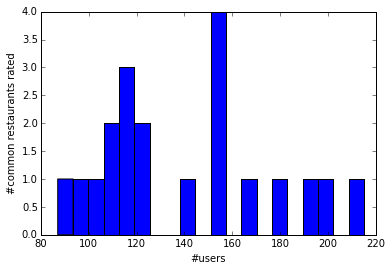

In [173]:
def convert(term_dict):
    term_dict_v = list(term_dict.itervalues())
    term_dict_k = list(term_dict.iterkeys())
    coo = coo_matrix(term_dict_v, zip(*term_dict_k))
    return csr_matrix(coo)

user_rating_matrix=convert(user_rating_dict)
from numpy import arange
%matplotlib inline
# Next let's plot the number of ratings per users
ratings_per_user = user_rating_matrix.sum(axis=0).tolist()[0]

plt.figure()
plt.hist(ratings_per_user, bins=20)
plt.xlabel('#users')
plt.ylabel('#common restaurants rated')
plt.show()

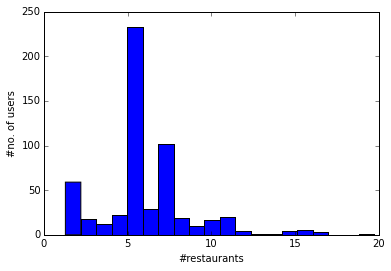

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
# Now we can count the predicted ratings with user profiles using cosine.
ratings_per_user = predicted.sum(axis=1).transpose().tolist()[0]

plt.figure()
plt.hist(ratings_per_user, bins=20)
plt.xlabel('#restaurants')
plt.ylabel('#no. of users')
plt.show()

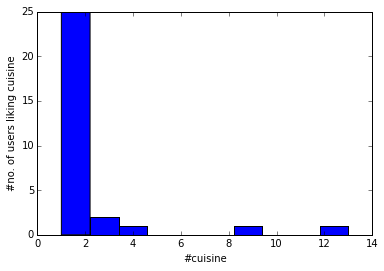

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
# Now we can count the cuisine likers
ratings_per_user = Cuisine_matrix.sum(axis=0).tolist()[0]

plt.figure()
plt.hist(ratings_per_user, bins=10)
plt.xlabel('#cuisine')
plt.ylabel('#no. of users liking cuisine')
plt.show()